# Начало тренировок

Для начала давайте разберем [тренировочный турнир](https://imcs.dvfu.ru/cats/problems?cid=6851588;sid=) от CODE work.

## Задача "Поиск в массиве"

Дана последовательность $a_1, a_2, \ldots, a_n$, для которой выполнено $a_i \leq a_{i+1}$ для любого $i=1..n-1$. Для каждого элемента последовательности $b_1, b_2, \ldots, b_m$ определить, присутствует ли он в последовательности $\{a_i\}$.

### Наивный алгоритм

In [1]:
# Находит число x в упорядоченном списке a
def find_in_sorted_container(a, x):
    return x in a

Ввод-вывод:

```python
with open('input.txt', 'r') as fin:
    n, m = map(int, fin.readline().split())
    a = list(map(int, fin.readline().split()))
    b = list(map(int, fin.readline().split()))

with open('output.txt', 'w') as fout:
    for x in b:
        if find_in_sorted_container(a, x):
            print("YES", file=fout)
        else:
            print("NO", file=fout)
```

Если отправить приведенное выше решение в тестирующую систему, то получится результат "Превышено время выполнения программы". Почему так происходит? В условии задачи сказано, что $n, m \leq 10^5$. Таким образом, цикл `for x in b` выполнится $m$ раз. Но функция `find_in_sorted_container`, несмотря на отсутствие явных циклов, потребует порядка $n$ обращений к элементам контейнера `a`. Следовательно, сложность наивного алгоритма составила $O(nm)$ операций.

Эта запись означает, что с ростом $n, m$ время выполнения вашей программы будет увеличиваться не сильнее, чем пропорционально $nm$. То есть, если 5 раз увеличить $n$ и $m$ в 10 раз, то оценка времени выполнения программы $O(nm)$ возрастет в $10^{10}$ раз - а это уже довольно много (для справки: одна секунда - это порядка $10^8$ - $10^9$ простейших операций).

### Решение с помощью структуры данных

Обратим внимание, как мы храним элементы массива `a`. В условии задачи сказано, что массив упорядочен по возрастанию, но мы никак этим не воспользовались. Вместо этого мы воспользовались операцией `in`, которая просматривает весь массив от начала до конца в поисках искомого числа.

Помимо массива, существуют другие способы организации хранения данных. Они различаются набором операций, выполняемых над множеством значений. В нашем случае нам нужна одна операция -- это поиск. Так что нам подойдет любая структура данных, обеспечивающая поиск в числовом множестве. Например, хеш-таблица. В языке Python такая структура данных уже реализована в стандартном контейнере `set`.

Давайте приведем наш список `a` к множеству `a_set` при помощи встроенной функции `set()`. А затем станем работать с этим новым контейнером.

```python
a_set = set(a)
# ...
    for x in b:
        if find_in_sorted_container(a_set, x):
# ...
```

Теперь наше решение принято в тестирующую систему. Однако с целью тренировки в программировании алгоритмов разберем ещё один способ.

### Двоичный поиск

Двоичный поиск - это самый эффективный алгоритм нахождения индекса заданного элемента в упорядоченном массиве. Алгоритм описан у [Кормена](https://yadi.sk/i/OgI3Y9bf5_NhAA). 

Идея алгоритма проста. Чтобы найти заданное число $x$ в последовательности $\{a_i\}$, которая представлена как массив (так что в ней быстро реализована операция доступа к элементу по его индексу), разобьем весь массив на два подмассива (почти) равной длины: $a[1..k]$ и $a[k+1..n]$. Элемент $a[k]$ будет *опорным*. Полагаем $k = \lfloor(l + r)/2\rfloor$, чтобы в худшем случае отбросить половину массива и уменьшить пространство поиска в 2 раза.

Справедливы утверждения:
* $x < a[k] \to \left(\forall i \in k+1..n \colon x < a[i] \right)$, то есть если $x$ меньше опорного элемента, то $x$ меньше любого элемента из правой половины массива;
* $x > a[k] \to \left(\forall i \in 1..k-1 \colon x > a[i] \right)$, то есть если $x$ больше опорного элемента, то $x$ больше любого элемента из левой половины массива.

Получаем алгоритм:

1. Если $x = a[k]$, то искомый элемент найден.
2. Если $x < a[k]$, то сводим задачу поиска в массиве $a[1..n]$ к задаче поиска в подмассиве $a[1..k-1]$.
3. Если $x > a[k]$, то сводим задачу поиска в массиве $a[1..n]$ к задаче поиска в подмассиве $a[k+1..n]$.

```{note}
При реализации данного алгоритма важно перед доступом к опорному элементу проверить, что подмассив непуст!
```

Время выполнения алгоритма составит $O(\log n)$, что гораздо быстрее, чем полный перебор, который требует $O(n)$ операций.

Вариант рекурсивной реализации:

```python
def binary_search(a, x, l, r):
    if l > r:  # подмассив a[l..r] пуст?
        return False
    k = (l + r) // 2  # индекс опорного элемента
    if x == a[k]:
        return True
    elif x < a[k]:
        # ...
    else:  # x > a[k]
        # ...
        
def find_in_sorted_container(a, x):
    return binary_search(a, x, 0, n-1)
```


Вариант итеративной реализации:

```python
l = 0
r = n - 1
ans = False
while l <= r:
    # ищем число x в подмассиве a[l..r]
    k = (l + r) // 2
    if x == a[k]:
        ans = True
        break
    elif x < a[k]:
        # изменить l, r - свести задачу к другой
    else  # x > a[k]
        # изменить l, r - свести задачу к другой
# ans == True, если число x есть в массиве a[0..n-1]
```



## Задача "Ближайшее число"

Дана последовательность чисел $a_1, a_2, \ldots, a_N$. Для каждого элемента этой последовательности найти ближайшее к нему справа в этой последовательности, которое будет больше него, либо определить, что такого числа не существует.

Например, для последовательности $1, 2, 4, 3, 3, 5, 4, 7$ ответ будет таким: $2, 4, 5, 5, 5, 7, 7, 7$ (для последнего числа искомого числа справа нет).

Изобразим этот пример на диаграмме. Для каждого столбика требуется найти ближайший к нему столбик справа, не ниже его.

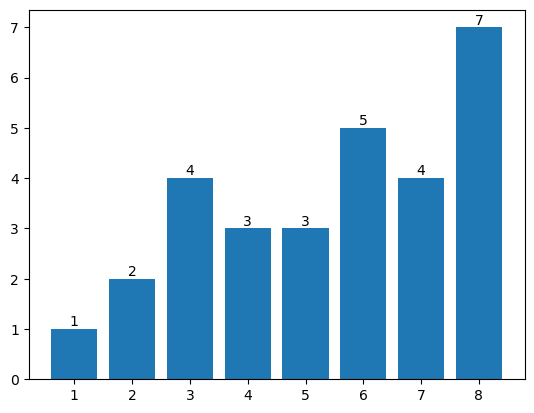

In [17]:
import matplotlib.pyplot as plt
data = [1, 2, 4, 3, 3, 5, 4, 7]
b = plt.bar([i for i in range(1, 9)], data)
plt.bar_label(b, labels=data)
plt.show()

### Эффективное решение

Алгоритм описан у [Луридаса](https://yadi.sk/i/J0mS63RpEhH8tw) (с. 19). 

Будем при чтении массива справа налево поддерживать структуру данных "стек", которая будет содержать возрастающую последовательность высот столбиков. Очередное число выталкивает из стека все столбики не выше него. Ответ для текущего числа - это высота столбика на вершине стека. Затем новое число добавляется в стек.

Поскольку каждое число однажды добавляется в стек и однажды удаляется из стека, то сложность алгоритма $O(n)$.

### Стек

*Стек* - это структура данных типа "последовательность", добавление и удаление элементов из которой производится с конца. В качестве реализации стека подойдет обычный динамический массив. Например, в Python это список с операциями `append` и `pop`.


## Задача "Дифтонги"

Дан набор строк, состоящих из строчных гласных и согласных латинских букв. Найти все слова с максимальным количеством дифтонгов. Дифтонг - это пара гласных букв, окруженных либо согласными буквами, либо границами слова.

Решение состоит из двух этапов.

1. Для каждого $i$-го слова вычислим число дифтонгов $d_i$.
2. Выведем все $i$-е слова, для которых $d_i$ максимально.

### Количество дифтонгов

Пусть $n$ - число букв в слове. Добавим слева и справа к слову любую согласную. Тогда буквы слова будут иметь индексы $1..n$.

Запишем условие $P(i)$, что $s[i..i+1]$, где $i \in 1..n-1$, - дифтонг.

$
P(i) = s[i]\text{ - гласная} \,\&\, s[i+1]\text{ - гласная} \,\&\, s[i-1]\text{ - согласная} \,\&\, s[i+2]\text{ - согласная}
$

### Конечный автомат

Представим себе машину Тьюринга, которая движется только вправо, читая слово, и периодически оказывается в состоянии, переход в которое означает, что найден очередной дифтонг. В такие моменты необходимо увеличить счетчик дифтонгов.

*Упражнение.* Составьте таблицу переходов для автомата, распознающего дифтонги.

### Поиск максимумов

Простейший алгоритм - двупроходный. Первым проходом по массиву $d_i$ находим максимум $d_i$. Вторым проходом выводим все $i$-е слова, соответствующие максимумам $d_i$.


## Задача “Максимум в скользящем окне”

Дан список из $n$ целых чисел. По этому списку перемещаются два указателя: $l$ и $r$. Изначально они оба указывают на начало списка. За один раз оба указателя могут перемещаться только вправо на одну позицию. Требуется определить для каждого перемещения указателей наибольший элемент среди $a[l], a[l+1], \ldots, a[r]$.

Обратим внимание, что наивное решение (нахождение максимума с просмотром каждый раз заново всех элементов списка от $l$-го до $r$-го) займет порядка $O(n^2)$ времени. Целью оптимизации является структурирование данных таким образом, чтобы при сдвиге указателей обновление максимума происходило очень быстро.

### Быстрое обновление максимума

Пусть $m$ – индекс самого левого максимума среди чисел $a[l], a[l+1], \ldots, a[r]$, так что $\forall i \in l..r\colon a[m] \geq a[i]$.

При сдвиге указателя $r$ на единицу вправо максимум обновляется легко: если $a[r+1] > a[m]$, то $m \leftarrow r + 1$, иначе $m$ остается прежним.

Разберемся, как обновить максимум при сдвиге указателя $l$ на единицу вправо. Возможны случаи:

1. $m > l$. Тогда $m$ остается прежним.

2. $m = l$. Это значит, что после $l$ последовательность $a[l], a[l+1], \ldots$ сначала не возрастает, а потом, возможно, начинает возрастать. Начнем с индекса $k = l + 1$ и будем итерационно переходить к новому значению $k \leftarrow {\rm nearest}[k]$. Здесь ${\rm nearest}[k]$ -- индекс ближайшего справа числа к $k$-му, большего либо равного ему. 
Если $\mathrm{nearest}[k] > r$, то это значит, что все числа от $k + 1$-го до $r$-го меньше, чем $k$-е число:
$$
(\mathrm{nearest}[k] > r) \to \forall i \in k+1..r \colon a[i] < a[k].
$$

Продолжение следует…
